# Waves

Closely related terms:
* normal modes
* natural oscillations / frequencies
* resonance
* collective modes
* dispersion relations

Suppose you knew the initial values for the $\vec{E}$ and $\vec{B}$ fields in a plasma at some initial time.  You might wonder what the fields are at any later time.

How do you answer this?

Consider the ridiculously simple example of a spring.  

(Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar)

In [1]:
from IPython.display import HTML
HTML('<img src="./Harmonic1.gif">')  # retrieved from http://mathforum.org/mathimages/imgUpload/SolveHarmonic.gif

The equations are:  

$$m \frac{dv}{dt} = F$$ 

$$v = \frac{dx}{dt}$$

$$F = -kx$$  

In principle you could use these equations to solve for the motion of the spring.

Or since there are three equations and three unknowns (x, v, and F), you can combine these equations into a single equation of only one quantity $x$:

$$\frac{d^2x}{dt^2} + \frac{k}{m}x = 0$$

With $\omega_0 = \sqrt{k/m}$, we find the harmonic oscillator equation:

$$\frac{d^2x}{dt^2} + \omega_0^2 x = 0$$

The solution to this equation is 
$$x = A \cos{\omega_0 t} + B \sin{\omega_0 t}$$  
where A and B are determined from the initial conditions for $x$ and $v$, and $\omega_0$ is the "natural" frequency.

In [2]:
from IPython.display import HTML
HTML('<img src="./Harmonic2.gif">')  # retrieved from https://www.maplesoft.com/view.aspx?SI=3926/forced_oscillations65.gif

If all we wanted was the natural frequency for a (set of coupled) equation(s), we could substitute $x = \Re[\bar{x}e^{i\omega t}]$ into the equation(s).

For our example ($\frac{d^2x}{dt^2} + \omega_0^2 x = 0$), this gives

$$(-\omega^2 + \omega_0^2) \bar{x}e^{i\omega t} = 0$$,

$$\omega = \pm \omega_0$$

We could also instead substitute $x = \bar{x}e^{i\omega t}$, $v = \bar{v}e^{i\omega t}$, and $F = \bar{F}e^{i\omega t}$ into the original three equations, giving  

$$[mi\omega \bar{v} = \bar{F}]e^{i\omega t}$$  
$$[\bar{v} = i\omega \bar{x}]e^{i\omega t}$$  
$$[\bar{F} = -k \bar{x}]e^{i\omega t}$$

This is now just a set of algebraic equations to solve (rather than a differential equation).  $\bar{x}$, $\bar{v}$, and $\bar{F}$ are complex numbers, sometimes called phasors.

Solving the three equations gives  

$$mi\omega(i\omega\bar{x}) = -k\bar{x}$$  
$$\left(-\omega^2 + \frac{k}{m}\right)\bar{x} = 0$$

and again we find $\omega = \sqrt{k/m}$.

This method is useful because sometimes it is not possible to obtain a single equation to solve.  We can "Fourier Analyze" each equation and then solve the algebraic equations for the Fourier "amplitudes."

Note that this only works for linear equations.  (Why??)

If we add an external driving force to the equations:

$$F = -kx + F_{ext}$$

then

$$\left(\frac{d^2}{dt^2} + \omega_0^2\right)x = F_{ext}$$

If $F_{ext} = F_0 e^{i\omega t}$ then when $\omega \rightarrow \omega_0$ the amplitude of x gets very large

$$\bar{x} = \frac{F_0}{-\omega^2 + \omega_0^2}$$

This is called resonance:  Drive something at its resonance (at its natural frequency) and it gets very large.

In [3]:
from IPython.display import HTML
HTML('<img src="./forcedoscillator.gif">')  # retrieved from http://www.acs.psu.edu/drussell/Demos/SHO/forced.gif

## Phase velocity

We now consider waves that can move in space as well as oscillate in time.

Consider the following partial differential equation:

$$\left(\frac{\partial^2}{\partial t^2} - v_{\phi}^2\frac{\partial^2}{\partial x^2}\right)\vec{E} = 0$$

This wave equation pops up in several areas across physics.  For example, by taking the curl of Faraday's law,

$$\nabla \times \left[- \nabla \times \vec{E} = \frac{\partial}{\partial t}\vec{B} \right]$$

and combining it with the time derivative of Ampere's Law in the case of zero current (like in a vacuum),

$$\frac{\partial}{\partial t} \left[ \nabla \times \vec{B} = \frac{1}{c^2}\frac{\partial}{\partial t}\vec{E} \right]$$

we get 

$$\nabla \times \nabla \times \vec{E} + \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\vec{E} = 0$$

If it is 1D-like with only variations in x (so that $\partial/\partial x \neq 0$ but $\partial/\partial y = \partial/\partial z = 0$),

$$\left(\frac{\partial^2}{\partial t^2} - c^2 \frac{\partial^2}{\partial x^2}\right)\vec{E} = 0$$

And $c$ turns out to be the velocity of these electromagnetic waves.

Returning to the above equation with $v_{\phi}$, let

$$E = \bar{E}e^{i(kx-\omega t)}$$

then

$$\left(-\omega^2 + k^2 v_{\phi}^2\right)\bar{E}e^{i(kx-\omega t)} = 0$$

$$ \omega = \pm k v_{\phi}$$

$ v_{\phi} = \omega/k $ is called the phase velocity of the wave.

RuntimeError: Requested MovieWriter (ffmpeg) not available

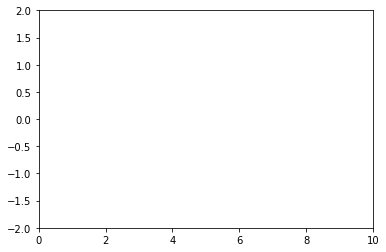

In [4]:
#####################
# CHANGE here to make different waves and watch the velocity change
w = 5.0
k = 1.0
#####################

# Thanks to http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/ and http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(); ax.set_xlim(( 0, 10)); ax.set_ylim((-2, 2)); line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], []); return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 10, 1000); y = np.sin(k * x - w * 0.05 * i); line.set_data(x, y); return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=int(2*np.pi/w*40), interval=20, blit=True)
HTML(anim.to_html5_video())

The "phase" is $\Phi = (kx-\omega t)$.  A peak of the wave corresponds to one value of the phase, a trough of the wave is another phase point, and etc.

If you track a peak of the wave (a point of constant phase) in space and time to see how fast it moves, you will be measuring the phase velocity.  By tracking a peak where the phase is constant:

$$\frac{d\Phi}{dt} = 0$$

which means that

$$k \frac{dx}{dt} - \omega = 0$$

from which we get

$$\frac{dx}{dt} = \frac{\omega}{k} = v_{\phi}$$

## Group velocity

In addition to $v_{\phi}$ there are other velocities associated with a wave.

To see this, consider two waves at slightly different frequencies and wavenumbers: $(\omega_1,k_1)$ and $(\omega_2,k_2)$:

$$E = A \cos{(k_1 x - \omega_1 t)} + B \cos{(k_2 x - \omega_2 t)}$$

$$E = A \cos{\Phi_1} + B \cos{\Phi_2}$$

By utilizing the trigonometric identity that $\cos{A}\cos{B} = \frac{1}{2}(\cos(\frac{A + B}{2}) + \cos(\frac{A - B}{2}))$,

$$E = 2A \cos\left(\frac{\Phi_1 + \Phi_2}{2}\right) \cos\left(\frac{\Phi_1 - \Phi_2}{2}\right)$$

$$E = 2A \cos(\bar{k}x - \bar{\omega}t) \cos\left(\frac{(\Delta k) x - (\Delta \omega) t}{2}\right)$$

where $\bar{k} = (k_1+k_2)/2 \approx k_1$ or $k_2$, and $\bar{\omega} = (\omega_1+\omega_2)/2 \approx \omega_1$ or $\omega_2$.

In [ ]:
#####################
# DRAG the slider button to watch the waves move
# BEWARE: because the plots are being generated at discrete time steps and at a discrete range of points,
# you may find that waves "fictiously" move at different velocities if the grid or frame rate
# does not properly resolve them
#####################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
x = np.linspace(0, 100, 1000);
def intplot(t=0,w1=20.0,k1=1.0,w2=20.05,k2=1.1):
    plt.figure(figsize=(8, 4))
    plt.plot(x,np.sin(k1 * x - w1 * t) + np.cos(k2 * x - w2 * t))
    plt.xlim(0,100)
    plt.ylim(-2,2)
interact(intplot,t=(0,250),w1=(0.1,40.0),k1=(0.1,40.0),w2=(0.1,40.0),k2=(0.1,40.0));

The solution here consists of the product of two motions.

The quickly oscillating wave $(\cos(\bar{k}x - \bar{\omega}t))$ moves at the phase velocity

$$ \frac{\bar{\omega}}{\bar{k}} \approx \frac{\omega_1}{k_1} \text{or} \frac{\omega_2}{k_2}$$

The envelope on top, $\cos((\Delta k x - \Delta \omega t)/2)$, moves at a different velocity called the group velocity

$$ \frac{\Delta\omega}{\Delta k} \approx \frac{\partial \omega}{\partial k} = v_g $$

$v_g$ can also be thought of as the energy transport velocity.  One can "communicate" with energy, so $v_g < c$ in order for special relativity to be satisfied, but there is no such restraint on $v_{\phi}$ (which can in fact be larger than $c$).

In [ ]:
#####################
# CHANGE the sliders to make different waves
# and NOTE the different slopes of v_phi vs v_g (can you tell which is which?)
# BEWARE: because the plots are being generated at discrete time steps and at a discrete range of points,
# you may find that waves "fictiously" move at different velocities if the grid or frame rate
# does not properly resolve them
#####################
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
x = np.linspace(0, 100, 5000);
plotdata = np.zeros( (100,5000) )
def xtplot(w1=20.0,k1=1.0,w2=20.05,k2=1.1):
    for t in range(100):
        plotdata[t,:] = np.sin(k1 * x - w1 * t) + np.cos(k2 * x - w2 * t)
    plt.figure(figsize=(8, 5))
    plt.imshow(plotdata,origin='lower',aspect='auto',extent=[0,100,0,100],cmap="nipy_spectral")
    plt.xlim(0,100); plt.ylim(0,100); plt.clim(-2,2); plt.colorbar(orientation='vertical'); 
    plt.title('Time vs Space'); plt.xlabel('x'); plt.ylabel('t')
interact(xtplot,t=(0,250),w1=(0.1,40.0),k1=(0.1,40.0),w2=(0.1,40.0),k2=(0.1,40.0));

### Question
-------
* Can identify $v_{\phi}$ and $v_g$ of the wave from this plot?
-------

## Dispersion

There are two key velocities:

$$v_{\phi} = \frac{\omega}{k}$$

$$v_g = \frac{\partial \omega}{\partial k}$$

These velocities depend on the relationship between $\omega$ and $k$.  Such a function, 

$$\omega(k)$$

is called **the dispersion relation** of the wave.

Pick a $k$, and then $\omega$ is defined.  
Pick an $\omega$, and then $k$ is defined.

We need dispersion relations to determine the behavior of waves in plasmas.

For the next several weeks, our goal will be to derive the dispersion relation $\omega(k)$ for many of the basic waves which can exist in a plasma.  (**not all** - not enough time.)